In [1]:
# Author : Utkarsh Kulshrestha
# Email : kuls.utkarsh1205@gmail.com
# Mobile : +91-8197094433
# Designation : Artificial Intelligence Engineer
# This Algorithm is representing the Naive Bayes for classifying HAM & SPAM messages

## Import Data and Libraries 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
message=pd.read_csv(r"C:\Users\hindo\Downloads\sms_spam.csv", sep=',')
message.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

In [4]:
message.describe()

,type,text
count,5574,5574
unique,2,5160
top,ham,"Sorry, I'll call later"
freq,4827,30


In [5]:
message.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4827   4518                             Sorry, I'll call later   30
spam   747    642  Please call our customer service representativ...    4

In [6]:
message['length']=message['text'].apply(len)
message.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Data Visualization

<Axes: ylabel='Frequency'>

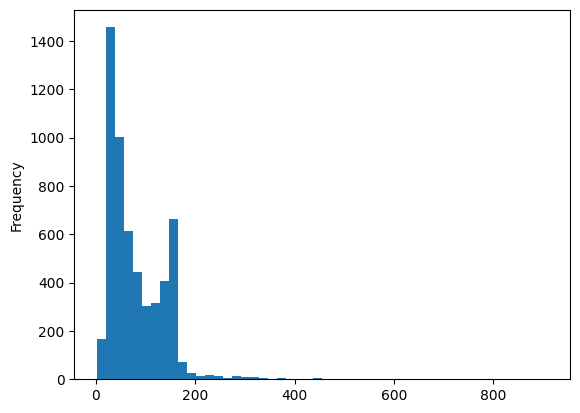

In [7]:
message['length'].plot(bins=50,kind='hist')

In [8]:
message.length.describe()

count    5574.000000
mean       80.444923
std        59.841828
min         2.000000
25%        36.000000
50%        61.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [9]:
message[message['length']==910]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

## Text Pre-Processing

In [10]:
import string
mess = 'sample message!...'
nopunc=[char for char in mess if char not in string.punctuation]
nopunc=''.join(nopunc)
print(nopunc)

sample message


In [11]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [12]:
nopunc.split()

['sample', 'message']

In [13]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [14]:
message['text'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

## Feature Engineering & TFIDF

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(message['text'])
print(len(bow_transformer.vocabulary_))

11401


In [17]:
messages_bow = bow_transformer.transform(message['text'])

In [18]:
#from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.feature_extraction.text import tfidf_transformer
#messages_tfidf=tfidf_transformer.transform(messages_bow)
#print(messages_tfidf.shape)

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer

# Assuming you've already created the messages_bow variable (BoW representation)
# You can fit and transform using TfidfTransformer
tfidf_transformer = TfidfTransformer()
messages_tfidf = tfidf_transformer.fit_transform(messages_bow)

# Now, messages_tfidf contains the TF-IDF representation of your text data
print(messages_tfidf.shape)

(5574, 11401)


## Naive Bayes Classifier

In [20]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf,message['type'])

## Predictions

In [21]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


## Model Performance

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(message['type'],all_predictions))
print(confusion_matrix(message['type'],all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4827
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5574
   macro avg       0.99      0.92      0.95      5574
weighted avg       0.98      0.98      0.98      5574

[[4827    0]
 [ 115  632]]
